In [ ]:
# Standard data libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Libraries for text tokenization
!pip install tidytext
import tidytext
import nltk
nltk.download('punkt')

# Just need the STOPWORDS list for now
from wordcloud import STOPWORDS

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.6/208.6 kB 3.7 MB/s eta 0:00:00
  Created wheel for tidytext: filename=tidytext-0.0.1-py3-none-any.whl size=3870 sha256=5616619666932f35f0f5f5b2a09d99fa2da0651259d698a8d1d70232e336d328
  Stored in directory: /root/.cache/pip/wheels/88/40/40/04f8d22d7729547afa13c2cbffb494737351dd4465f2f26288
Successfully built tidytext


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
fake = pd.read_csv("https://zenodo.org/records/4561253/files/WELFake_Dataset.csv")

In [ ]:
# Clean up the dataset, removing unwanted columns and missing titles
del fake["Unnamed: 0"]
del fake["text"]

fake = fake.loc[ ~fake["title"].isna()]

In [ ]:
df = tidytext.unnest_tokens(fake, "word", "title")

In [ ]:
# Remove stop words
STOPWORDS = list(STOPWORDS)
STOPWORDS.append("’")
STOPWORDS.append("s")

df = df.loc[ ~df["word"].isin(STOPWORDS)]

In [ ]:
#df["label"] = df["label"].to_string()

In [ ]:
counts = df.groupby("label")["word"].value_counts(normalize=True)

In [ ]:
counts

label  word   
0      new        0.025943
       trump      0.025377
       york       0.021807
       times      0.021437
       us         0.015469
                    ...   
1      ‹          0.000003
       ₹1000      0.000003
       ₹500       0.000003
       俄罗斯总统观注    0.000003
       🚨bill      0.000003
Name: word, Length: 50533, dtype: float64

In [ ]:
# Cut out very infrequent (often garbage) words
counts = counts[counts > 0.0003]

In [ ]:
# Convert back to a dataframe
counts.name = "text_freq"
counts = counts.reset_index()

In [ ]:
counts.head(3)

,label,word,text_freq
0,0,new,0.025943
1,0,trump,0.025377
2,0,york,0.021807


In [ ]:
counts = counts.pivot(index= "word", columns= "label", values= "text_freq")

In [ ]:
counts

label,0,1
word,,
1,NaN,0.000334
10,NaN,0.000484
2,0.000461,0.000403
20,NaN,0.000305
2016,0.000832,0.000978
...,...,...
—,0.000303,0.000558
‘,0.004668,0.011830
“,NaN,0.015715


In [ ]:
# Remove NAs with "small value"/2
counts.loc[ counts[0].isna(), 0] = 0.0003/2
counts.loc[ counts[1].isna(), 1] = 0.0003/2

In [ ]:
counts["rf"] = counts[1]/counts[0]
counts["logratio"] = np.log10(counts["rf"])

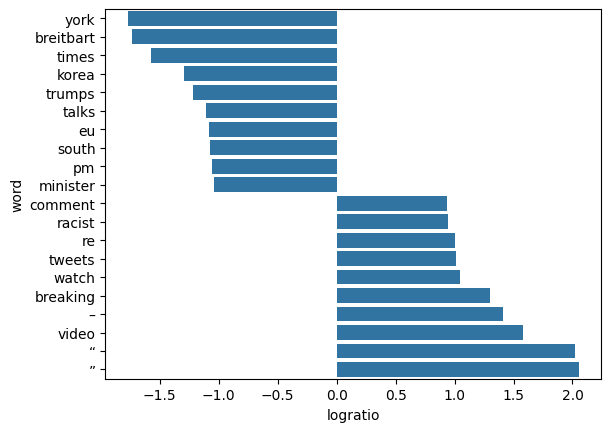

In [ ]:
counts = counts.sort_values("logratio", ascending=True)
firstlast = pd.concat([  counts[0:10] , counts[-10:]  ])

# What kind of plot should I use?
sns.barplot(data=firstlast, x="logratio", y="word")
plt.show()

In [ ]:
np.log10(2)

0.3010299956639812